In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [42]:
df = pd.read_csv("./../churn_data.csv")

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,4951.000000,4950,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4481,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.238295,NaN,NaN,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,NaN,39.718817,NaN,NaN,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


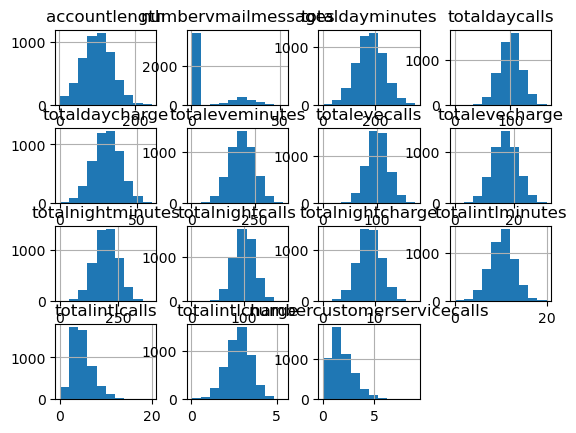

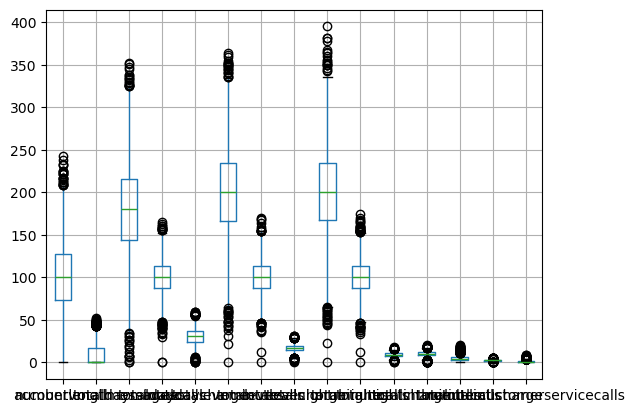

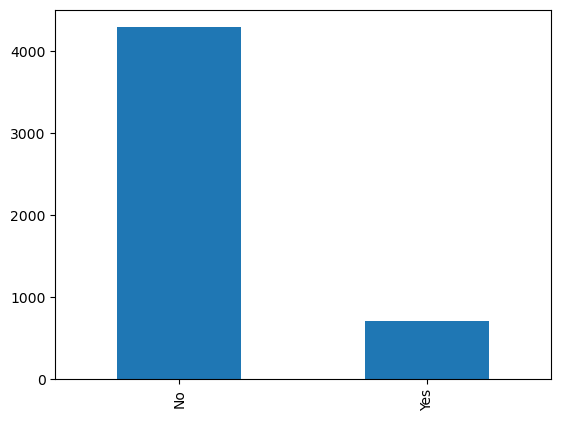

No     4293
Yes     707
Name: churn, dtype: int64

In [43]:
df.hist()
plt.show()

df.boxplot()
plt.show()

df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

In [44]:
#sns.set(style="ticks")
#sns.pairplot(df, hue="churn", markers=["o", "s"])

#plt.legend(title="Churn", loc="upper right")

#plt.show()

In [45]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")

numerical_cols = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")

rows with missing values: 793
columns with missing values: 17
rows with missing values: 0
columns with missing values: 0


In [46]:
df = df.dropna()

df['churn'].value_counts()

df = (df.groupby('churn', as_index=False).apply(lambda x: x.sample(n=min(df["churn"].value_counts()))).reset_index(drop=True))

In [47]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})


In [48]:
def remove_outliers (df,cols):
    new_df = df.copy()
    for col in cols:
        q1 = np.percentile(new_df[col], 25)
        q3 = np.percentile(new_df[col], 75)
        iqr = q3-q1

        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr

        upper_array = np.where(df[col]>=upper)[0]
        lower_array = np.where(df[col]<=lower)[0]

        new_df = new_df.drop(index=upper_array)
        new_df = new_df.drop(index=lower_array)
        return new_df

df.describe()


,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,100.955180,0.832390,0.796322,5.980352,189.998603,100.089548,32.271824,206.072416,100.656604,17.500939,202.152750,100.159451,9.103290,10.516255,4.320923,2.837809,1.880348
std,39.195573,0.373651,0.402874,12.308066,62.147117,19.818652,10.553449,50.539729,19.266283,4.308338,50.144701,20.257858,2.257352,2.724105,2.434963,0.736279,1.580643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.300000,12.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,1.000000,1.000000,0.000000,144.125000,87.000000,24.485000,170.525000,88.000000,14.475000,168.825000,87.000000,7.615000,8.725000,3.000000,2.357500,1.000000
50%,100.238295,1.000000,1.000000,0.000000,186.000000,100.000000,31.550000,207.250000,100.243838,17.645000,204.050000,100.000000,9.180000,10.500000,4.000000,2.840000,1.569091
75%,127.000000,1.000000,1.000000,0.000000,234.800000,113.000000,39.910000,240.100000,113.000000,20.410000,236.600000,114.000000,10.665000,12.300000,5.000000,3.320000,3.000000
max,233.000000,1.000000,1.000000,49.000000,351.500000,165.000000,59.760000,363.700000,168.000000,30.910000,395.000000,168.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df